# Maplotlib basic

In [6]:
import matplotlib.pyplot as plt
import numpy as np

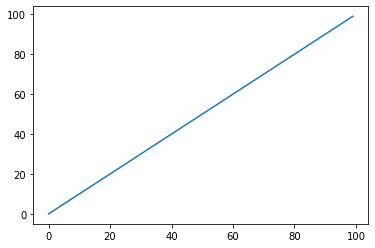

In [7]:
X = range(100)
Y = [v for v in X]
plt.plot(X,Y)


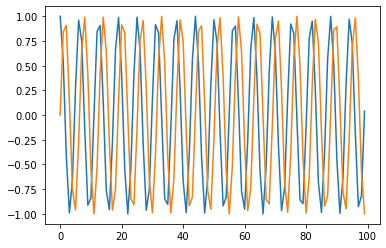

In [8]:
X_1 = range(100)
Y_1 = [np.cos(value) for value in X] 

X_2 = range(100)
Y_2 = [np.sin(value) for value in X] 

plt.plot(X_1,Y_1)
plt.plot(X_2,Y_2)
plt.show()


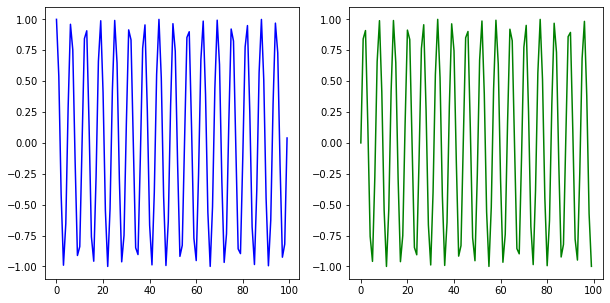

In [11]:
fig = plt.figure()
fig.set_size_inches(10,5)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)

ax_1.plot(X_1,Y_1, c="b")
ax_2.plot(X_2,Y_2, c="g")

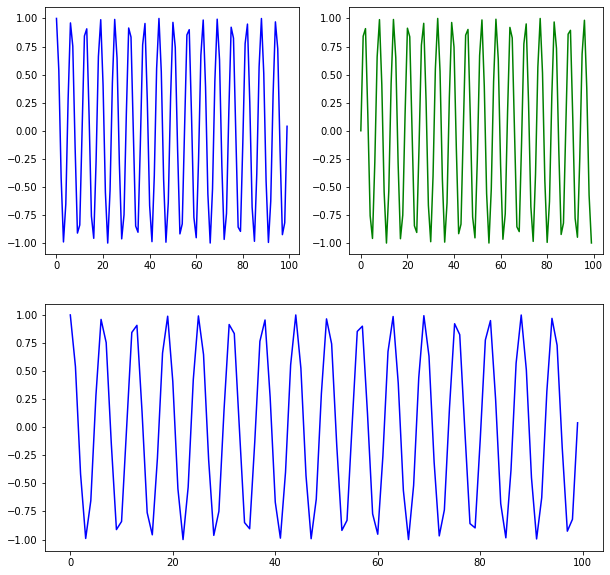

In [26]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,1,2)

ax_1.plot(X_1,Y_1, c="b")
ax_2.plot(X_2,Y_2, c="g")
ax_3.plot(X_1,Y_1, c="b")
ax_4.plot(X_2,Y_2, c="g")

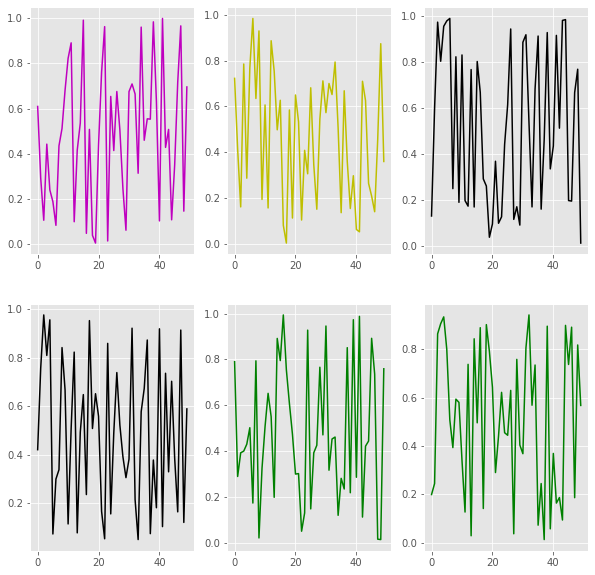

In [30]:
fig = plt.figure()
fig.set_size_inches(10,10)
plt.style.use("ggplot")

ax = []
colors = ['b','g','r','c','y','m','y','k']
for i in range(1,7):
    ax.append(fig.add_subplot(2,3,i))
    X_1 = np.arange(50)
    Y_1 = np.random.rand(50)
    c=colors[np.random.randint(1, len(colors))]
    
    ax[i-1].plot(X_1,Y_1,c=c)

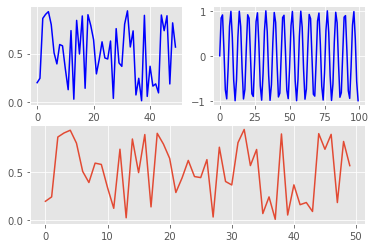

In [47]:
fig  = plt.figure()

ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,1,2)

ax_1.plot(X_1, Y_1, c="b")
ax_2.plot(X_2, Y_2, c="b")
ax_3.plot(X_1, Y_1)



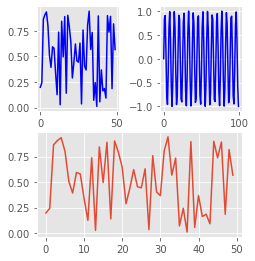

In [53]:
fig  = plt.figure()

ax_2.margins(1,1)

left = 0.124
right = 0.6
bottom = 0.1
top = 0.9
wspace = 0.5
hspace = 0.1
fig.subplots_adjust(left,bottom,right,top,wspace,hspace=None)

ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,1,2)

ax_1.plot(X_1, Y_1, c="b")
ax_2.plot(X_2, Y_2, c="b")
ax_3.plot(X_1, Y_1)

fig.subplots_adjust(left,bottom,right,top,wspace,hspace=None)

In [56]:
import pandas as pd

df = pd.read_csv("viz/phone_data.csv")
df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [57]:
def parsedate(date_info):
    import datetime
    return date_info[:9]

일별 네트워크별 데이터의 총량을 다중 plot으로 작성하라

In [58]:
df["day"] = df["date"].map(parsedate)
df.head()

,index,date,duration,item,month,network,network_type,day
0,0,15/10/14 06:58,34.429,data,2014-11,data,data,15/10/14
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile,15/10/14
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile,15/10/14
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile,15/10/14
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile,15/10/14


In [61]:
result=df.groupby(['day','network'])['duration'].sum().reset_index()
result

,day,network,duration
0,01/01/15,data,34.429
1,01/02/15,data,34.429
2,01/02/15,landline,103.000
3,01/03/15,Meteor,9.000
4,01/03/15,data,34.429
...,...,...,...
455,31/10/14,data,34.429
456,31/12/14,Meteor,363.000
457,31/12/14,Vodafone,4.000
458,31/12/14,data,34.429


In [63]:
result['network'].unique().tolist()

['data',
 'landline',
 'Meteor',
 'Tesco',
 'Vodafone',
 'Three',
 'voicemail',
 'special',
 'world']

In [64]:
result[result["network"] == "data"].head()

,day,network,duration
0,01/01/15,data,34.429
1,01/02/15,data,34.429
4,01/03/15,data,34.429
7,01/11/14,data,34.429
9,01/12/14,data,34.429


In [77]:
result[result["network"]== network_name]

,day,network,duration
8,01/12/14,Three,2.0
14,02/02/15,Three,2.0
19,02/03/15,Three,463.0
24,02/11/14,Three,2507.0
30,03/02/15,Three,6.0
...,...,...,...
430,29/01/15,Three,362.0
435,29/11/14,Three,151.0
444,30/11/14,Three,10.0
446,30/12/14,Three,19.0


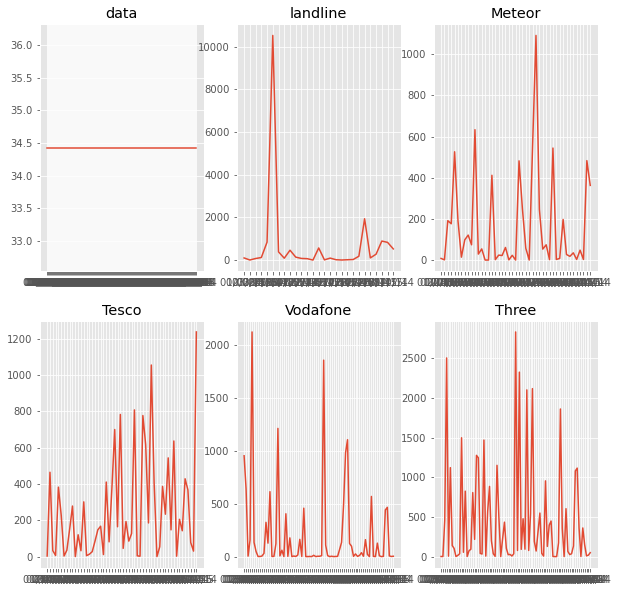

In [78]:
fig = plt.figure()
fig.set_size_inches(10,10)

network_types = result['network'].unique().tolist()
ax = []

for i in range(1,7):
    ax.append(fig.add_subplot(2,3,i))
    network_name = network_types[i-1]
    
    plt.title(network_name)
    
    X_1 = result[result["network"]== network_name]["day"]
    Y_1 = result[result["network"] == network_name]["duration"]
    ax[i-1].get_xaxis().set_visible(False)
    ax[i-1].plot(X_1, Y_1)

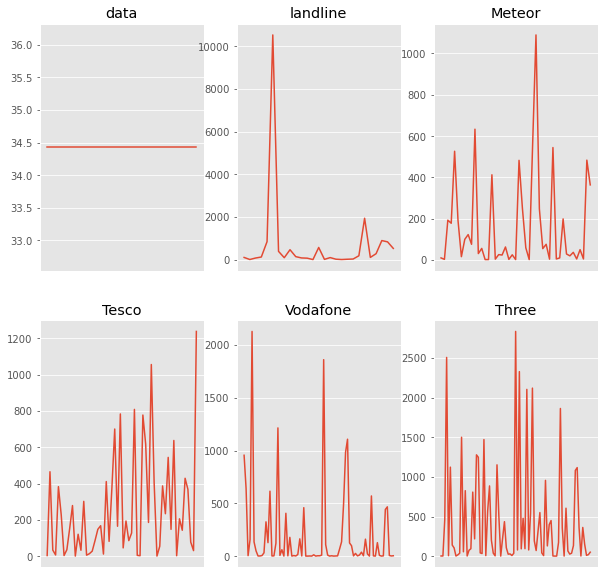

In [79]:
fig = plt.figure()
fig.set_size_inches(10,10) # 싸이즈 설정
# plt.style.use("ggplot")    # 스타일적용

network_types = result["network"].unique().tolist()
ax = []
for i in range(1,7):
    ax.append(fig.add_subplot(2,3,i)) # 두개의 plot 생성
    network_name = network_types[i-1]
    
    plt.title(network_name)

    X_1 = result[result["network"] == network_name]["day"]
    Y_1 = result[result["network"] == network_name]["duration"]
    ax[i-1].get_xaxis().set_visible(False)
    ax[i-1].plot(X_1, Y_1)